In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2023-08-30 17:13:06.398306: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-30 17:13:06.412057: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 17:13:06.518894: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 17:13:06.519463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 17:13:07.365404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(len(X_train))
print(len(X_test))

60000
10000


(28, 28)
()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

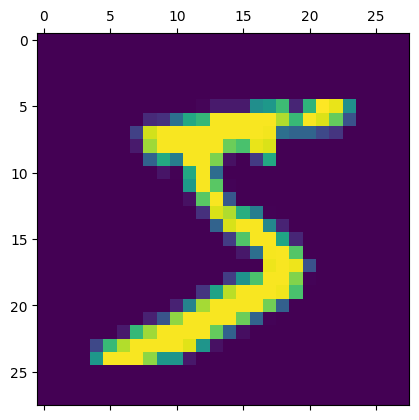

In [3]:
plt.matshow(X_train[0])
print(X_train[0].shape)
print(y_train[0].shape)

X_train = X_train.reshape(len(X_train), 28 * 28)
X_test = X_test.reshape(len(X_test), 28 * 28)

plt.matshow([X_train[0],1])


In [4]:
import keras
from keras.datasets import mnist
# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4571 - accuracy: 0.8661 - val_loss: 0.2362 - val_accuracy: 0.9312
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2648 - accuracy: 0.9211 - val_loss: 0.1901 - val_accuracy: 0.9448
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2162 - accuracy: 0.9355 - val_loss: 0.1622 - val_accuracy: 0.9535
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1844 - accuracy: 0.9454 - val_loss: 0.1444 - val_accuracy: 0.9578
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1644 - accuracy: 0.9503 - val_loss: 0.1356 - val_accuracy: 0.9597
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1452 - accuracy: 0.9566 - val_loss: 0.1232 - val_accuracy: 0.9630
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1342 - accuracy: 0.9589 - val_loss: 0.1145 - val_accuracy: 0.9647
Epoch 

In [5]:
# model.predict(X_test.round(3))
layers = model.layers

# Xem các trọng số và độ lệch của các layer
for layer in layers:
    weights = layer.get_weights()
    if len(weights) > 0:
        print("Layer:", layer.name)
        for i, weight in enumerate(weights):
            print(f"Weights {i} shape:", weight.shape)
            print(f"Weights {i}:", weight)
print(model.evaluate(X_test, y_test))

Layer: dense
Weights 0 shape: (784, 128)
Weights 0: [[-0.07956477 -0.02954966  0.05913687 ... -0.06773224  0.04596674
   0.07891393]
 [ 0.04427304  0.03897247 -0.0408422  ... -0.01301537 -0.01338197
  -0.04207428]
 [-0.06881492  0.06123117  0.0596358  ... -0.01239297 -0.02175242
  -0.00943436]
 ...
 [ 0.04662026  0.05557057 -0.07499894 ...  0.06006043 -0.02034188
  -0.07866573]
 [ 0.07188379  0.03563822 -0.02546142 ... -0.0703444   0.04622179
  -0.01677379]
 [ 0.03263328  0.00619089 -0.00345422 ...  0.02390351 -0.01050412
  -0.00390285]]
Weights 1 shape: (128,)
Weights 1: [ 2.03653630e-02 -1.19494557e-01  1.27030253e-01  8.93330649e-02
 -1.15235768e-01  3.59972604e-02  6.02030419e-02  1.14031240e-01
 -2.79960465e-02 -1.50629669e-01  2.58521497e-01 -1.43905908e-01
 -2.39637848e-02 -6.20706044e-02  9.52830762e-02 -5.22117177e-03
 -4.50317487e-02 -1.80829376e-01  1.35753797e-02  2.61862278e-02
  1.06262557e-01  5.10925381e-03  1.17764045e-02 -2.33910494e-02
 -1.08620994e-01 -6.69938773e-0

7


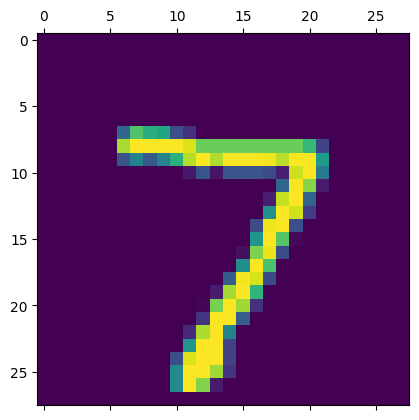

In [6]:
X_test = X_test.reshape(len(X_test), 28, 28)
plt.matshow(X_test[0])
print(y_test[0])